In [1]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
#print(hf['absIx'])
neural_dat=np.array(hf['CellResp'])
del hf

regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')
cell_pos=regressors['data']['CellXYZ'][0][0]
missing_values=regressors['data']['IX_inval_anat'][0][0]
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [12]:
def compute_weights(neural_dat):
    variances=np.var(neural_dat,axis=0)
    var_sum=np.sum(1./variances)
    numerator=1./variances
    weights=numerator/var_sum
    print(weights.shape)
    return weights

def compute_weighted_average(neural_dat):
    weights=compute_weights(neural_dat)
    weighted_average=np.average(neural_dat,weights=weights,axis=1)
    return weighted_average

In [13]:
weighted_average=compute_weighted_average(neural_dat)

(83205,)


In [14]:
print(weighted_average.shape)

(2880,)


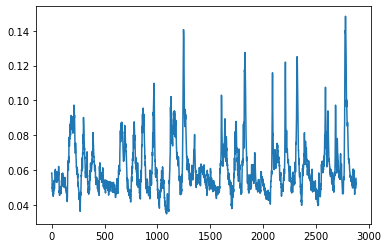

In [15]:
plt.plot(weighted_average)

(array([   53.,   252.,   964.,  4614., 20792., 19434., 13612., 10867.,
         8643.,  3974.]),
 array([-0.67598595, -0.5191376 , -0.36228925, -0.2054409 , -0.04859256,
         0.10825579,  0.26510414,  0.42195249,  0.57880083,  0.73564918,
         0.89249753]),
 <a list of 10 Patch objects>)

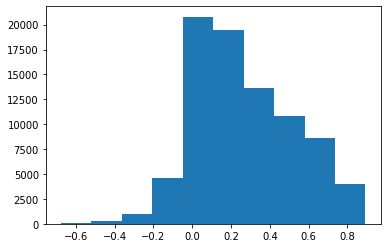

In [17]:
corr_lst=[]
for j in range(0,83205):
    corr_lst.append(np.corrcoef(weighted_average,neural_dat[:,j])[0,1])
plt.hist(corr_lst)

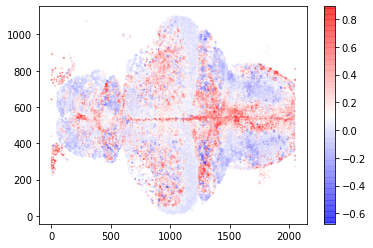

In [18]:
plt.scatter(cell_pos[:,0], cell_pos[:,1], s = 1, c = corr_lst, cmap='bwr', alpha = .5)
plt.colorbar()